In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import re
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
df_job = pd.read_csv('C:\\Users\\Hilda Cris\\Documents\\ISDS 7070\\Final Project Test\\fake_job_postings.csv')

In [4]:
# what has null? -> location, department, salary_range, company_profile, description, requirements, 
# benefits, employment_type, required_experience, required_education, industry, function

df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df_job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
#Variables change blank spaces to 'Not Specified'
# what has null? -> location, department, salary_range, company_profile, description, requirements, 
# benefits, employment_type, required_experience, required_education, industry, function

df_job['location'].replace(np.nan,'Not Specified', inplace=True)
df_job['department'].replace(np.nan,'Not Specified', inplace=True)
df_job['salary_range'].replace(np.nan,'Not Specified', inplace=True)
df_job['company_profile'].replace(np.nan,'Not Specified', inplace=True)
df_job['description'].replace(np.nan,'Not Specified', inplace=True)
df_job['requirements'].replace(np.nan,'Not Specified', inplace=True)
df_job['benefits'].replace(np.nan,'Not Specified', inplace=True)
df_job['employment_type'].replace(np.nan,'Not Specified', inplace=True)
df_job['required_experience'].replace(np.nan,'Not Specified', inplace=True)
df_job['required_education'].replace(np.nan,'Not Specified', inplace=True)
df_job['industry'].replace(np.nan,'Not Specified', inplace=True)
df_job['function'].replace(np.nan,'Not Specified', inplace=True)

In [7]:
# Creating Dummy variables


# Create a new column has_dep for has location of the department yes = 1 and no (Not Specified) = 0
df_job['has_loc'] = df_job['location']

#Create dummy variables for has_loc
pd.set_option('mode.chained_assignment', None)

df_job['has_loc'].replace('Not Specified',0, inplace=True)
df_job.has_loc[df_job.has_loc != 0] = 1


# Create a new column has_dep for has description of the department yes = 1 and no (Not Specified) = 0
df_job['has_dep'] = df_job['department']

#Create dummy variables for has_dep
pd.set_option('mode.chained_assignment', None)

df_job['has_dep'].replace('Not Specified',0, inplace=True)
df_job.has_dep[df_job.has_dep != 0] = 1


# Create a new column has_dep for has salary_range yes = 1 and no (Not Specified) = 0
df_job['has_srange'] = df_job['salary_range']

#Create dummy variables for has_srange
pd.set_option('mode.chained_assignment', None)

df_job['has_srange'].replace('Not Specified',0, inplace=True)
df_job.has_srange[df_job.has_srange != 0] = 1


# Create a new column has_cp for has company profile yes = 1 and no (aka NaN, blank) = 0
df_job['has_cp'] = df_job['company_profile']

#Create dummy variables has_cp
pd.set_option('mode.chained_assignment', None)

df_job['has_cp'].replace('Not Specified',0, inplace=True)
df_job.has_cp[df_job.has_cp != 0] = 1


# Create a new column has_req for requirements yes = 1 and no (Not Specified) = 0
df_job['has_req'] = df_job['requirements']

#Create dummy variables for has_req
pd.set_option('mode.chained_assignment', None)

df_job['has_req'].replace('Not Specified',0, inplace=True)
df_job.has_req[df_job.has_req != 0] = 1


# Create a new column has_dep for has benefits yes = 1 and no (Not Specified) = 0
df_job['has_bfts'] = df_job['benefits']

#Create dummy variables for has_bfts
pd.set_option('mode.chained_assignment', None)

df_job['has_bfts'].replace('Not Specified',0, inplace=True)
df_job.has_bfts[df_job.has_bfts != 0] = 1


# Create a new column has_dep for has employment_type yes = 1 and no (Not Specified) = 0
df_job['has_emty'] = df_job['employment_type']

#Create dummy variables for has_emty
pd.set_option('mode.chained_assignment', None)

df_job['has_emty'].replace('Not Specified',0, inplace=True)
df_job.has_emty[df_job.has_emty != 0] = 1


# Create a new column has_dep for has required_experience yes = 1 and no (Not Specified) = 0
df_job['has_reqe'] = df_job['required_experience']

#Create dummy variables for has_reqe
pd.set_option('mode.chained_assignment', None)

df_job['has_reqe'].replace('Not Specified',0, inplace=True)
df_job.has_reqe[df_job.has_reqe != 0] = 1


# Create a new column has_dep for has required_education yes = 1 and no (Not Specified) = 0
df_job['has_reqed'] = df_job['required_education']

#Create dummy variables for has_reqed
pd.set_option('mode.chained_assignment', None)

df_job['has_reqed'].replace('Not Specified',0, inplace=True)
df_job.has_reqed[df_job.has_reqed != 0] = 1


# Create a new column has_dep for has industry yes = 1 and no (Not Specified) = 0
df_job['has_ind'] = df_job['industry']

#Create dummy variables for has_reqed
pd.set_option('mode.chained_assignment', None)

df_job['has_ind'].replace('Not Specified',0, inplace=True)
df_job.has_ind[df_job.has_ind != 0] = 1


# Create a new column has_dep for has function yes = 1 and no (Not Specified) = 0
df_job['has_funct'] = df_job['function']

#Create dummy variables for has_funct
pd.set_option('mode.chained_assignment', None)

df_job['has_funct'].replace('Not Specified',0, inplace=True)
df_job.has_funct[df_job.has_funct != 0] = 1


df_job.head()
#df_job.has_cp.unique()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_dep,has_srange,has_cp,has_req,has_bfts,has_emty,has_reqe,has_reqed,has_ind,has_funct
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,...,1,0,1,1,0,1,1,0,0,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,1,0,1,1,1,1,1,0,1,1
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Specified,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,...,0,0,1,1,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,1,0,1,1,1,1,1,1,1,1
4,5,Bill Review Manager,"US, FL, Fort Worth",Not Specified,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,0,0,1,1,1,1,1,1,1,1


In [8]:
# new data frame with split value columns 
new_loc = df_job['location'].str.split(", ", n = 1, expand = True) 
  
# making separate Country column from new data frame 
df_job['Country']= new_loc[0] 
  
# making separate State and City column from new data frame 
df_job['State_City']= new_loc[1] 
  
# Dropping State_City columns 
df_job.drop(columns =['State_City'], inplace = True)

# df display 
df_job

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_srange,has_cp,has_req,has_bfts,has_emty,has_reqe,has_reqed,has_ind,has_funct,Country
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,...,0,1,1,0,1,1,0,0,1,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,1,1,1,1,1,0,1,1,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Specified,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,...,0,1,1,0,0,0,0,0,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,1,1,1,1,1,1,1,1,US
4,5,Bill Review Manager,"US, FL, Fort Worth",Not Specified,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,0,1,1,1,1,1,1,1,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,Not Specified,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,...,0,1,1,1,1,1,0,1,1,CA
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,Not Specified,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,...,0,1,1,1,1,1,1,1,1,US
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Not Specified,Not Specified,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Not Specified,0,...,0,1,1,0,1,0,0,0,0,US
17878,17879,Graphic Designer,"NG, LA, Lagos",Not Specified,Not Specified,Not Specified,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,...,0,0,1,1,1,1,1,1,1,NG


In [9]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             17880 non-null  object
 16  func

In [10]:
# Change type of variables

df_job['has_cp'] = df_job['has_cp'].astype(int)
df_job['has_loc'] = df_job['has_loc'].astype(int)
df_job['has_dep'] = df_job['has_dep'].astype(int)
df_job['has_srange'] = df_job['has_srange'].astype(int)
df_job['has_req'] = df_job['has_req'].astype(int)
df_job['has_bfts'] = df_job['has_bfts'].astype(int)
df_job['has_emty'] = df_job['has_emty'].astype(int)
df_job['has_reqe'] = df_job['has_reqe'].astype(int)
df_job['has_reqed'] = df_job['has_reqed'].astype(int)
df_job['has_ind'] = df_job['has_ind'].astype(int)
df_job['has_funct'] = df_job['has_funct'].astype(int)

df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             17880 non-null  object
 16  func

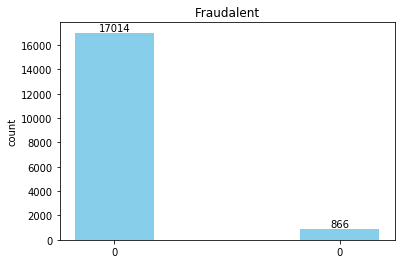

In [11]:
fakepc = df_job.groupby('fraudulent').job_id.count()

ind = np.arange(len(fakepc))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, fakepc, width,
                color='SkyBlue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Fraudalent')
ax.set_xticks(ind)
ax.set_xticklabels(df_job['fraudulent'])
# ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "center")

plt.show()

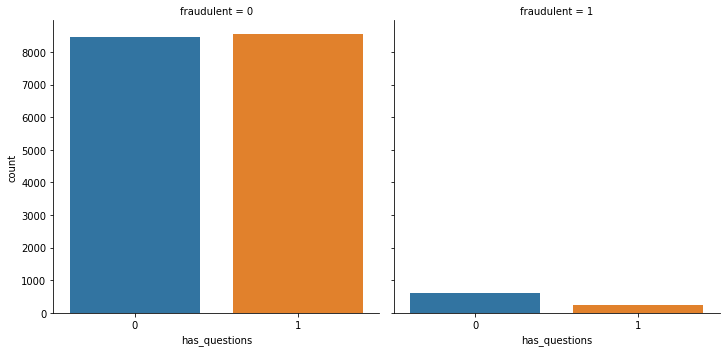

In [76]:
graph_quesfake = sns.catplot(x='has_questions', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

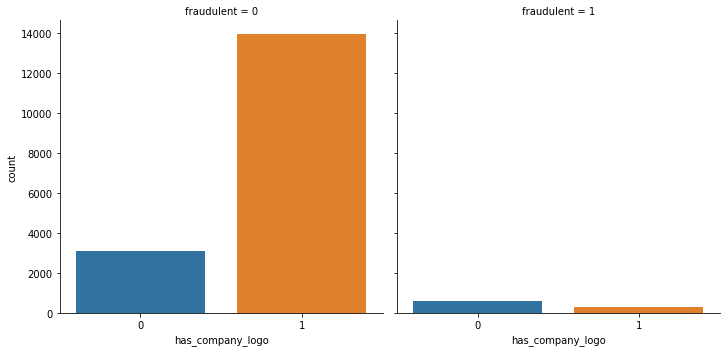

In [75]:
graph_logofake = sns.catplot(x='has_company_logo', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

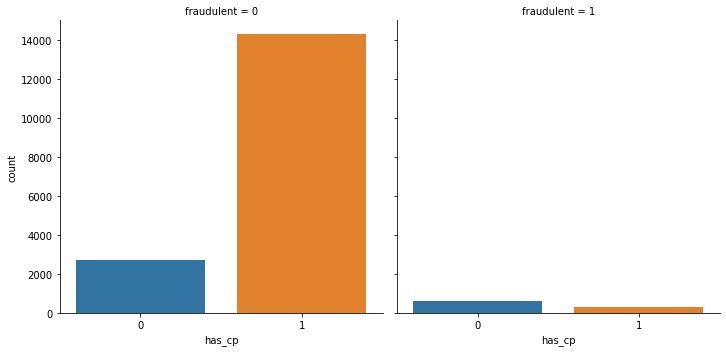

In [74]:
graph_cpfake = sns.catplot(x='has_cp', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

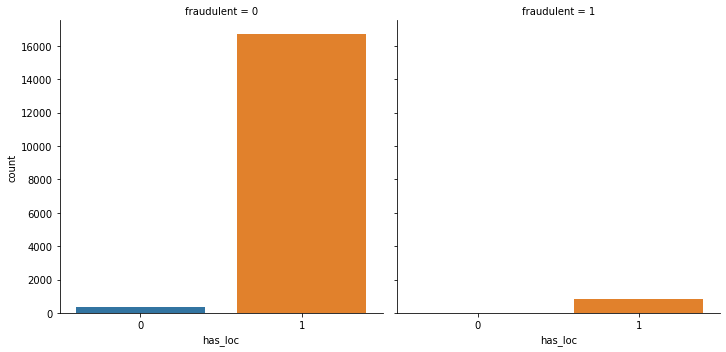

In [73]:
graph_locfake = sns.catplot(x='has_loc', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

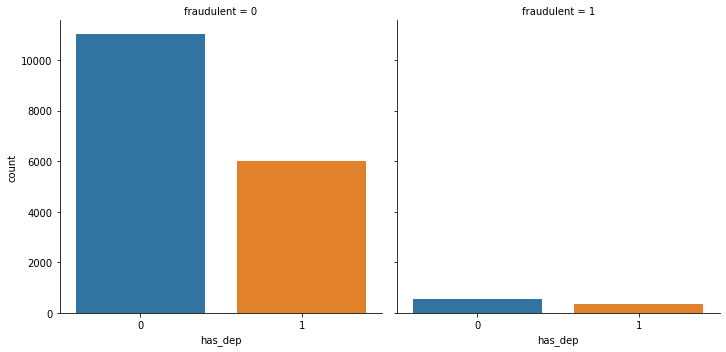

In [72]:
graph_depfake = sns.catplot(x='has_dep', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

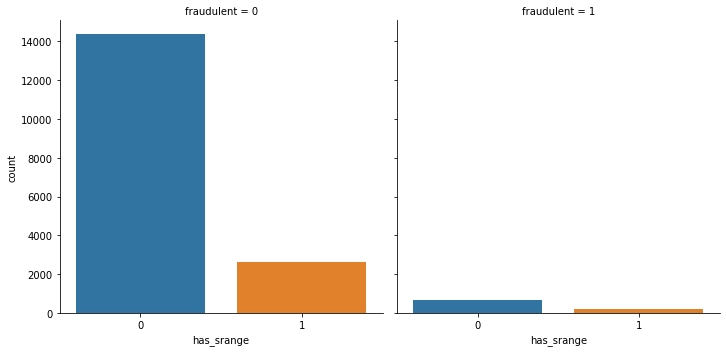

In [71]:
graph_srangefake = sns.catplot(x='has_srange', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

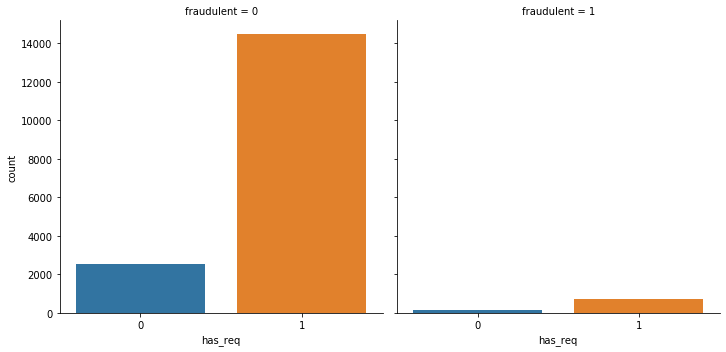

In [70]:
graph_reqfake = sns.catplot(x='has_req', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

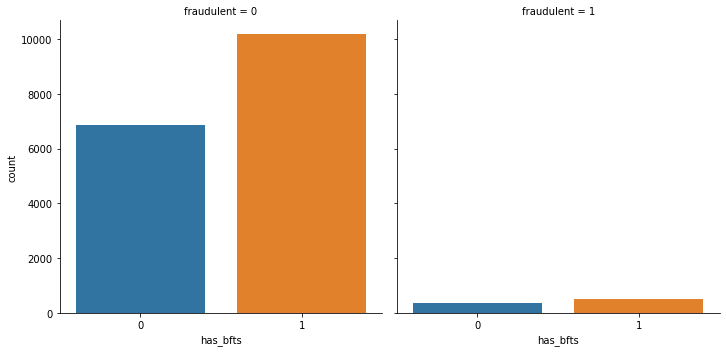

In [77]:
graph_bftsfake = sns.catplot(x='has_bfts', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

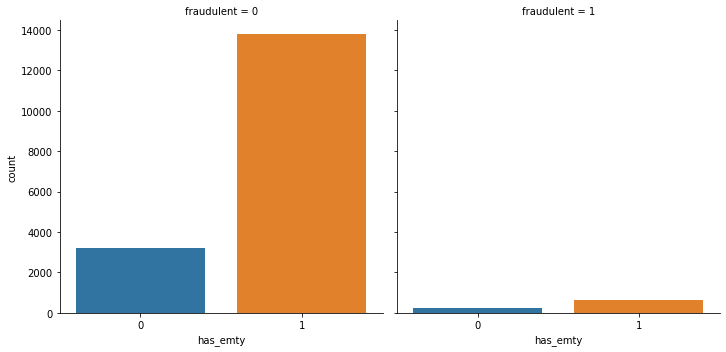

In [79]:
graph_bftsfake = sns.catplot(x='has_emty', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

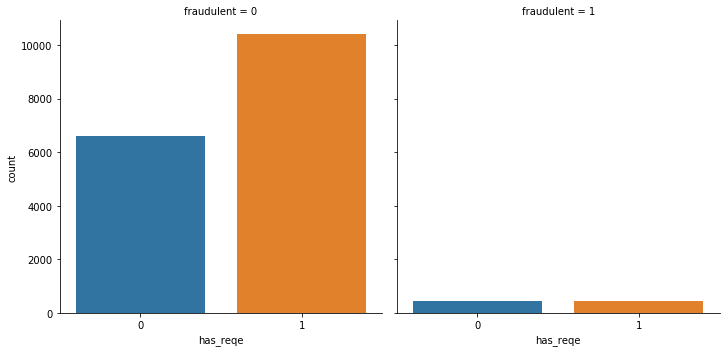

In [114]:
graph_reqefake = sns.catplot(x='has_reqe', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

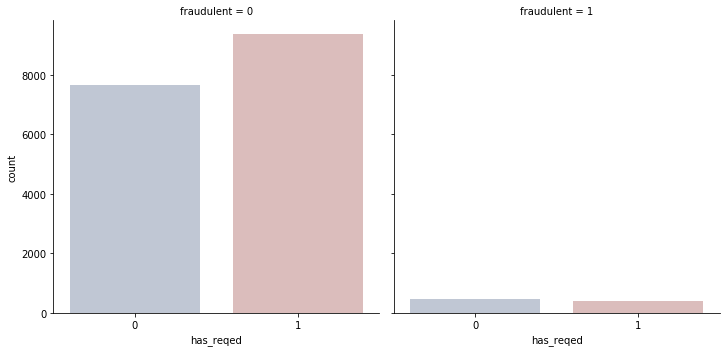

In [123]:
graph_reqedfake = sns.catplot(x='has_reqed', col='fraudulent', kind='count', data=df_job, palette='vlag');

#graph_funfrau.set_xticklabels(rotation=65)

#graph_reqedfake.savefig('Has Required Education',dpi = (600))

In [102]:
reqed_fake = pd.crosstab(index=df_job['fraudulent'], 
                           columns=df_job['has_reqed'])

#country_fake.index= [df_job['Country']]
#pd.options.display.max_rows=91

reqed_fake

has_reqed,0,1
fraudulent,,
0,7654,9360
1,451,415


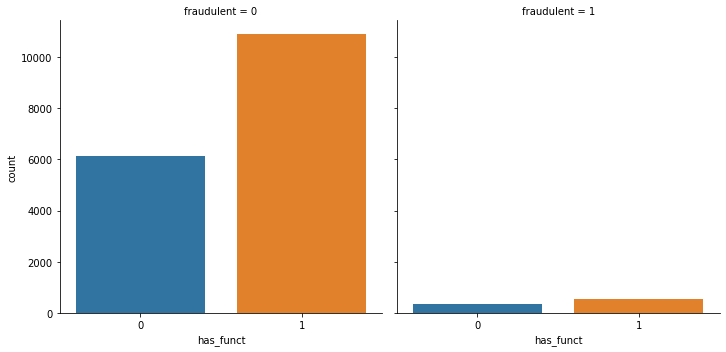

In [100]:
graph_functfake = sns.catplot(x='has_funct', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

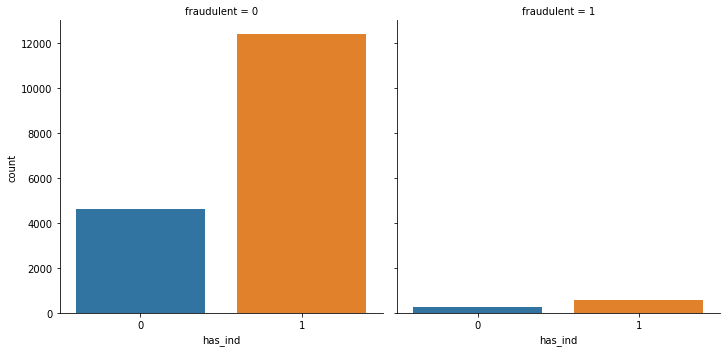

In [99]:
graph_indfake = sns.catplot(x='has_ind', col='fraudulent', kind='count', data=df_job);

#graph_funfrau.set_xticklabels(rotation=65)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

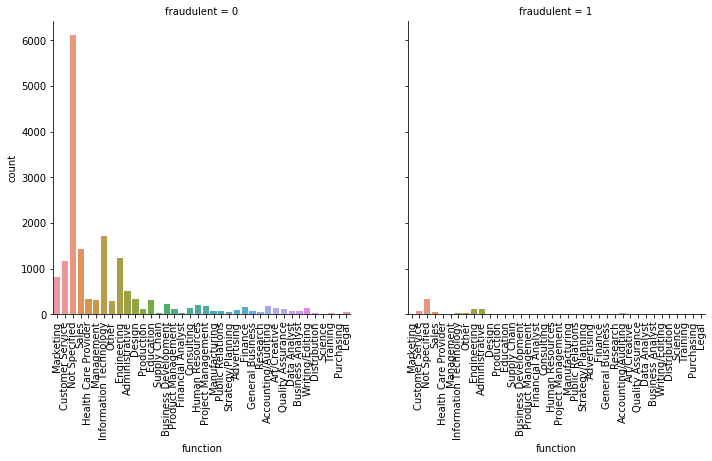

In [80]:
graph_funfrau = sns.catplot(x='function', col='fraudulent', kind='count', data=df_job);

graph_funfrau.set_xticklabels(rotation=90)

# graph_funfrau.savefig('FunctionFake4',dpi = (600))

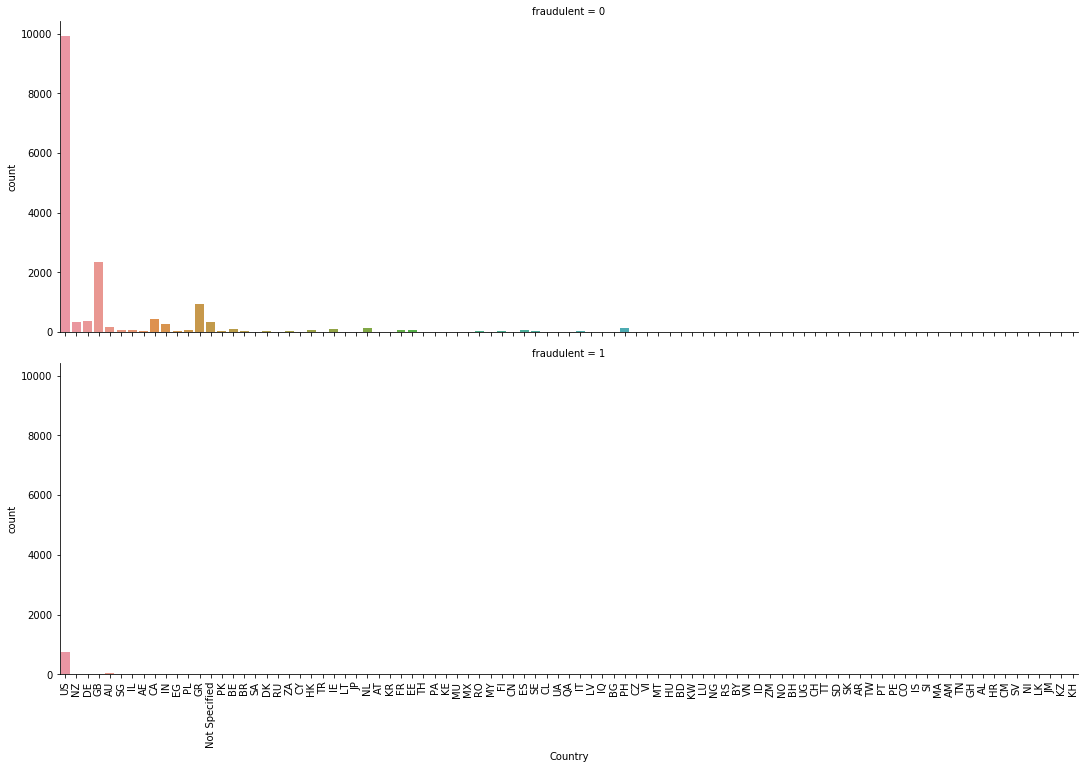

In [81]:
graph_countryfrau = sns.catplot(x='Country', col='fraudulent', kind='count', data=df_job, aspect=3,
    height=5, col_wrap=1);

graph_countryfrau.set_xticklabels(rotation=90)
#df_job.groupby('Country').fraudulent.count()

graph_countryfrau.savefig('CountryFake',dpi = (40))

In [82]:
#df_job.groupby('Country','fraudulent').fraudulent.count()

country_fake = pd.crosstab(index=df_job['Country'], 
                           columns=df_job['fraudulent'])

#country_fake.index= [df_job['Country']]
pd.options.display.max_rows=91

country_fake

fraudulent,0,1
Country,,
AE,53,1
AL,1,0
AM,2,0
AR,9,0
AT,14,0
AU,174,40
BD,2,0
BE,117,0
BG,17,0


In [83]:
x = df_job[['telecommuting','has_company_logo','has_questions','has_loc','has_dep','has_srange','has_cp','has_req','has_bfts','has_emty','has_reqe','has_reqed','has_ind','has_funct']]
y = df_job['fraudulent']

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,stratify=y,test_size=.25)

In [85]:
model = RandomForestRegressor(n_estimators=500, max_depth=12, bootstrap=True)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
# model.predict(X_test)
y_pred = model.predict(x_test)

In [87]:
# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('R-Squared:', r2)

Mean squared error: 0.0340732966272841
R-Squared: 0.25906866241347914


In [88]:
# Instantiate model and fit to data; clf = classifier
clf = tree.DecisionTreeClassifier()

# Train our model 
clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [90]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.958165548098434


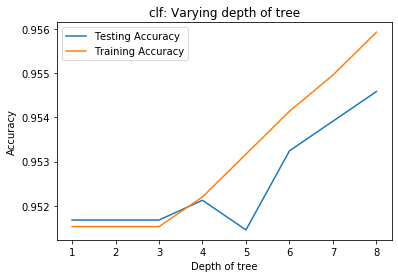

In [91]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [129]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

In [93]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4253,    1],
       [ 212,    4]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

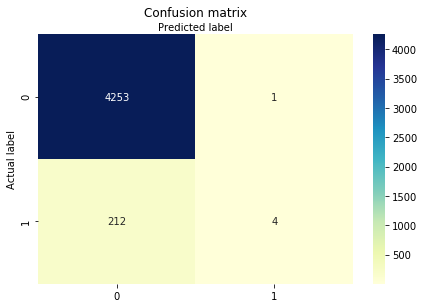

In [94]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9523489932885906
Precision: 0.8
Recall: 0.018518518518518517
